# 이상치 처리

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Administrator/Desktop/캐글 실습데이터/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<Axes: ylabel='BMI'>

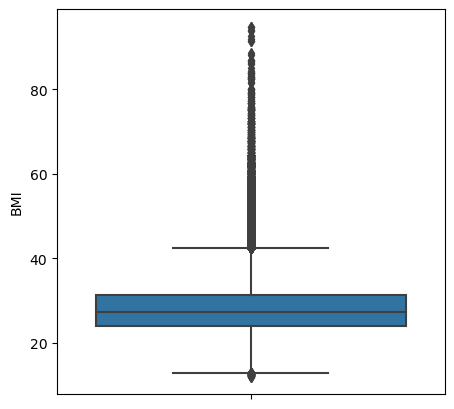

In [6]:
plt.figure(figsize=(5,5))
sns.boxplot(y='BMI', data=df)

In [7]:
# 이상치 제거 방법
q1=df.BMI.quantile(0.25)
q3=df.BMI.quantile(0.75)

iqr=q3-q1
rev_range=3

df_filter= df.loc[(df.BMI> q1-3*iqr)&(df.BMI< q3+ rev_range*iqr)]



<Axes: ylabel='BMI'>

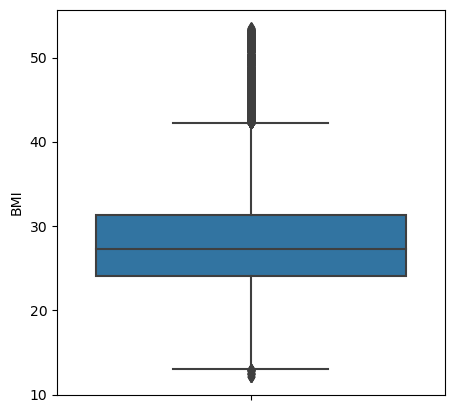

In [8]:
plt.figure(figsize=(5,5))
sns.boxplot(y='BMI',data=df_filter)

In [9]:
print(df['BMI'].describe())
print(df_filter['BMI'].describe())

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64
count    318476.000000
mean         28.193093
std           6.009855
min          12.020000
25%          24.020000
50%          27.320000
75%          31.320000
max          53.580000
Name: BMI, dtype: float64


In [10]:
# 이상치 대치

In [12]:
def replace_outlier(value):
    q1=df.BMI.quantile(0.25)
    q3=df.BMI.quantile(0.75)
    iqr=q3-q1
    rev_range=3 
    
    if ((value < (q1-rev_range*iqr))):
        value=q1-rev_range*iqr
    
    if ((value > (q3-rev_range*iqr))):
        value=q3+rev_range*iqr
    
    return value

df['BMI']=df['BMI'].apply(replace_outlier)  

KeyboardInterrupt: 

In [ ]:
df['BMI']=df['BMI'].apply(replace_outlier)

In [13]:
! pip install xverse
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
df=pd.read_csv("C:/Users/Administrator/Desktop/캐글 실습데이터/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [18]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(x='BMI', data=df, height=5,aspect=2)


In [21]:
# 임의 구간 기준 설정하여 구간화




df2=df.copy()
df2.loc[df2.BMI<=20,'BMI_bin']="a"

df2.loc[(df2.BMI>20)&(df2.BMI <=30),'BMI_bin']="b"
df2.loc[(df2.BMI>30)&(df2.BMI <=40),'BMI_bin']="c"
df2.loc[(df2.BMI>40)&(df2.BMI <=50),'BMI_bin']="d"
df2.loc[(df2.BMI>50)&(df2.BMI <=60),'BMI_bin']="e"
df2.loc[(df2.BMI>60)&(df2.BMI <=70),'BMI_bin']="f"
df2.loc[df2.BMI>70,'BMI_bin']="g"


df2.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_bin
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,b
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,b
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,b
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,c
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,d


In [22]:
df2['BMI_bin'].unique()

array(['a', 'b', 'c', 'd', 'e', 'g', 'f'], dtype=object)

In [25]:
plt.figure(figsize=(12,6))
plt
sns.displot(df2['BMI_bin'],height=5,aspect=3)


In [ ]:
# cut() 함수를 사용한 변수 구간화

In [ ]:
df2.insert(3,'BMI_bin2',0)

df2['BMI_bin2']=pd.cut(df2.BMI,bins=[0,20,30,40,50,60,70,95],
                      labels=['a','b','c','d','e','f','g'])

df2.head()

In [ ]:
df2.BMI_bin2.value_counts().to_frame().style.background_gradient()

In [81]:
# qcut()함수를 이용한 변수 구간화

df2.insert(4,'BMI_bin3',0)

df2['BMI_bin3']=pd.qcut(df2.BMI,q=7,labels=['a','b','c','d','e','f','g'])

In [84]:
df2['BMI_bin3'].value_counts().to_frame().style.background_gradient()

,BMI_bin3
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


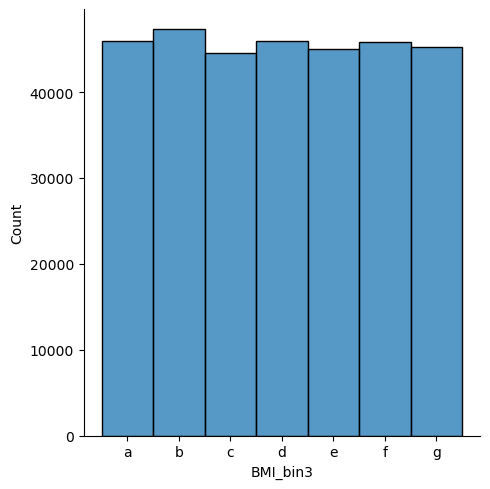

In [85]:
sns.displot(x='BMI_bin3',data=df2)

In [113]:
df3 =df.copy()

In [114]:
df3=pd.get_dummies(df)
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,BMI_bin_a,BMI_bin_b,BMI_bin_c,BMI_bin_d,BMI_bin_e,BMI_bin_g
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,0
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,1,0,1,0,0,1,0,0,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0


In [1]:
x=df3[['PhysicalHealth']]
y=df3[['KidneyDisease_Yes']]

NameError: name 'df3' is not defined

In [116]:
y=y.T.squeeze()

In [117]:
df3[['KidneyDisease_Yes']]

,KidneyDisease_Yes
0,0
1,0
2,0
3,0
4,0
...,...
319790,0
319791,0
319792,0
319793,0


In [121]:
clf=WOE()
clf.fit(x,y)

a=clf.woe_df

b=clf.iv_df

AttributeError: module 'pandas.core.algorithms' has no attribute 'quantile'

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
